Dataset Shape: (22, 93)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 93 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Product     22 non-null     object
 1   2023-07-01  22 non-null     int64 
 2   2023-07-02  22 non-null     int64 
 3   2023-07-03  22 non-null     int64 
 4   2023-07-04  22 non-null     int64 
 5   2023-07-05  22 non-null     int64 
 6   2023-07-06  22 non-null     int64 
 7   2023-07-07  22 non-null     int64 
 8   2023-07-08  22 non-null     int64 
 9   2023-07-09  22 non-null     int64 
 10  2023-07-10  22 non-null     int64 
 11  2023-07-11  22 non-null     int64 
 12  2023-07-12  22 non-null     int64 
 13  2023-07-13  22 non-null     int64 
 14  2023-07-14  22 non-null     int64 
 15  2023-07-15  22 non-null     int64 
 16  2023-07-16  22 non-null     int64 
 17  2023-07-17  22 non-null     int64 
 18  2023-07-18  22 non-null     int64 
 19  2023-07-19  22 non-null     

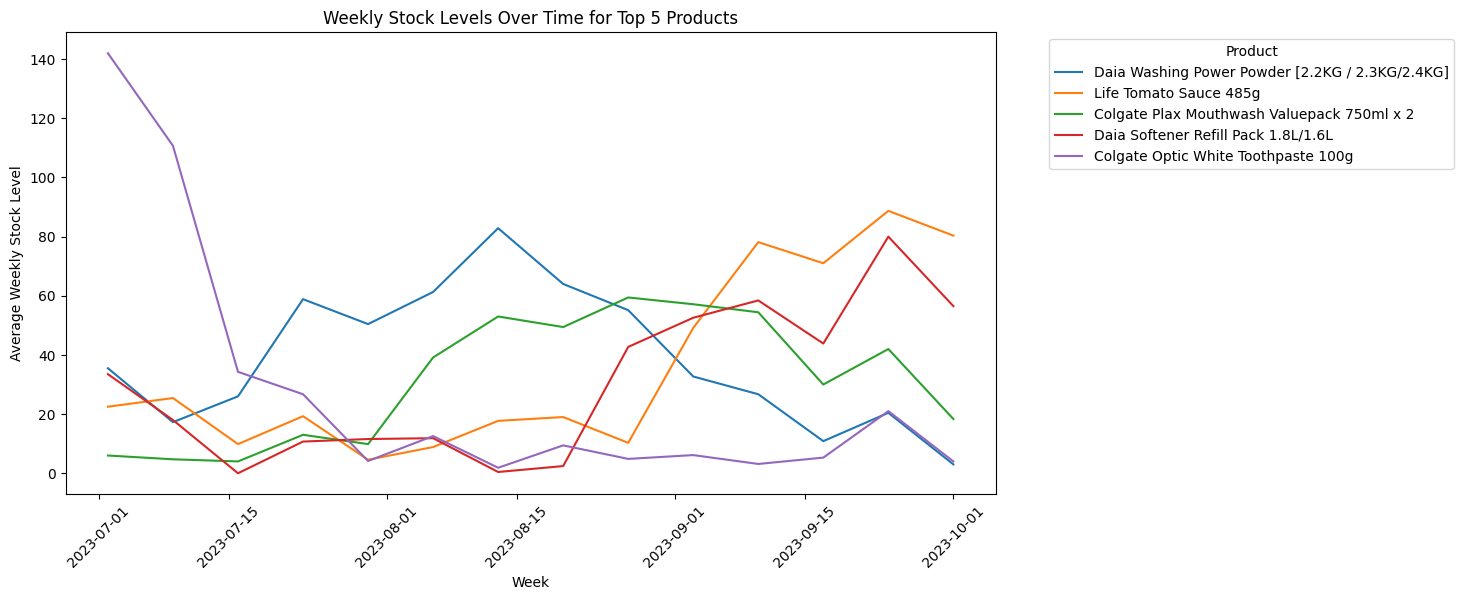

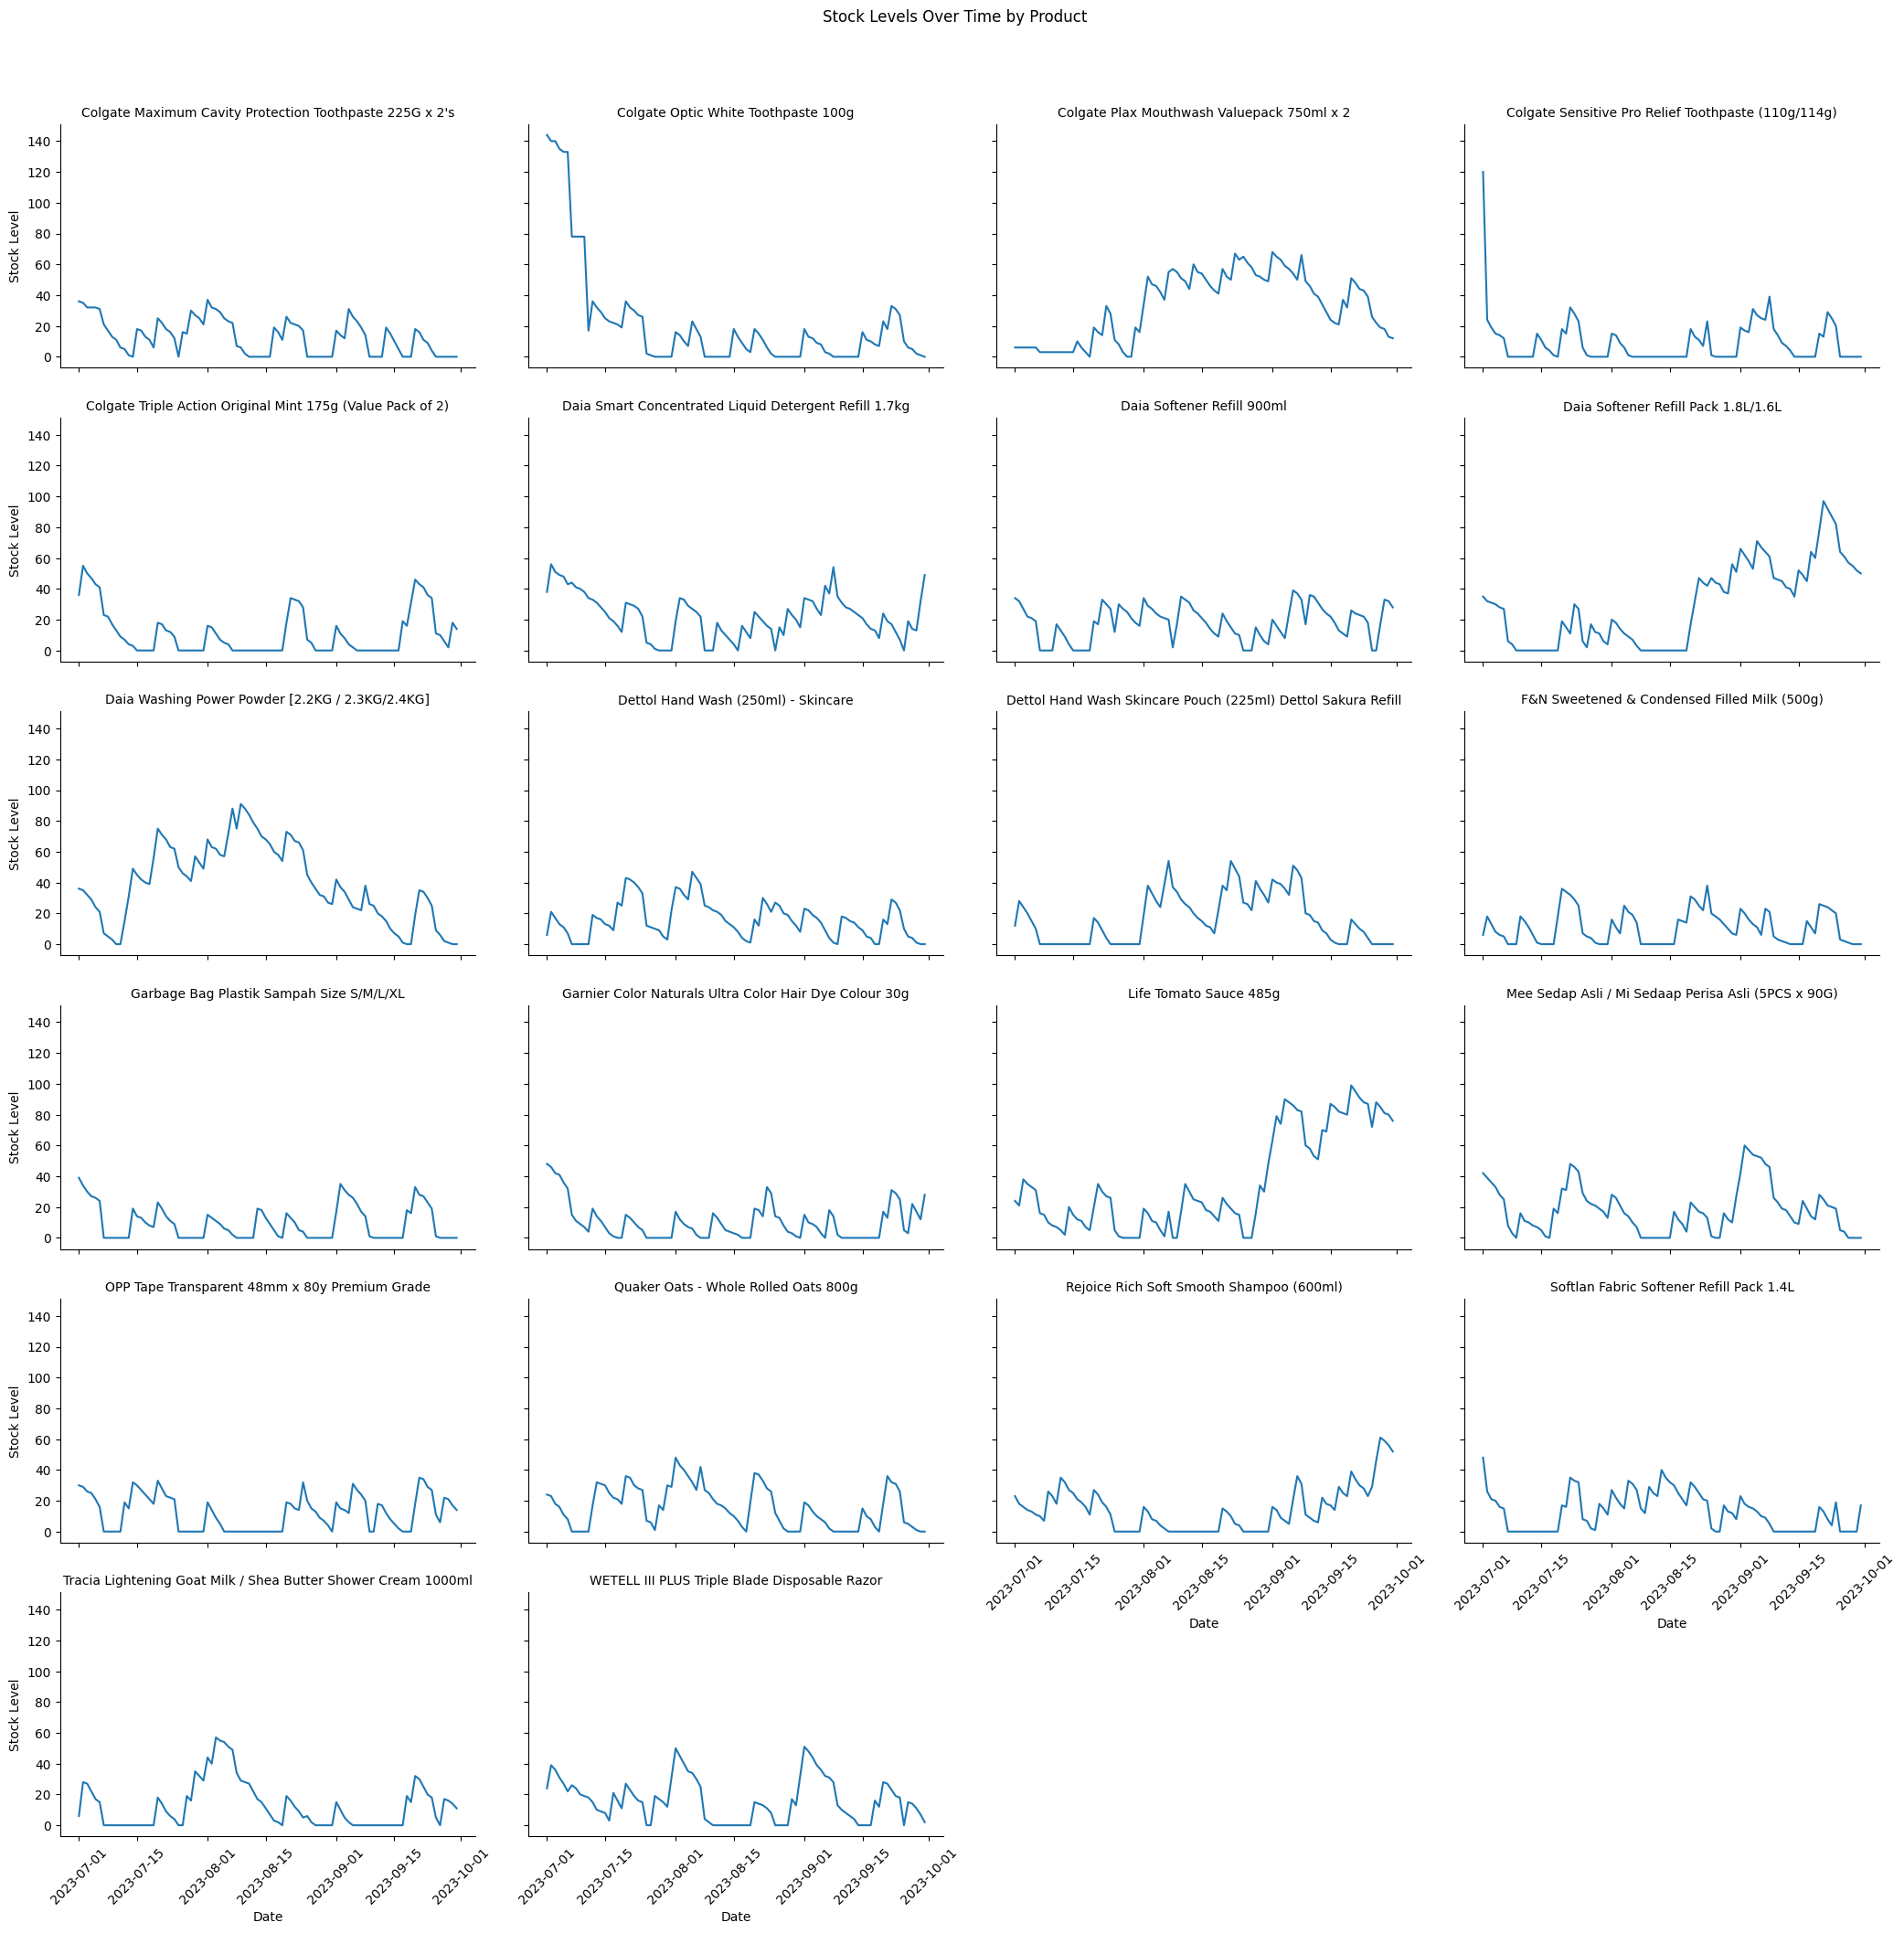

In [14]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
data = pd.read_csv('22_product_quantities_random_restock_limited_no_stock.csv')

# Step 3: Basic Data Inspection
print("Dataset Shape:", data.shape)
print("\nColumn Info:\n", data.info())
print("\nFirst 5 Rows:\n", data.head())

# Step 4: Univariate Analysis - Product-Wise Stock Analysis
# Analyzes stock levels for top 5 products with the highest average stock, grouped by week.

# Set 'Product' as the index temporarily to work with the date columns
weekly_data = data.set_index('Product').T
weekly_data.index = pd.to_datetime(weekly_data.index)  # Convert index to datetime

# Resample to weekly frequency, taking the mean for each week
weekly_data = weekly_data.resample('W').mean().T

# Select top 5 products by average stock level and plot their stock levels over time (weekly)
top_products = weekly_data.mean(axis=1).nlargest(5).index
top_product_data = weekly_data.loc[top_products]

plt.figure(figsize=(12, 6))
for product in top_product_data.index:
    sns.lineplot(x=top_product_data.columns, y=top_product_data.loc[product], label=product)
plt.title("Weekly Stock Levels Over Time for Top 5 Products")
plt.xlabel("Week")
plt.ylabel("Average Weekly Stock Level")
plt.xticks(rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 5: Multivariate Analysis - Facet Grid by Product
# Creates individual line plots for each product to view stock trends over time independently.
melted_data = data.melt(id_vars=['Product'], var_name='Date', value_name='Stock Level')
melted_data['Date'] = pd.to_datetime(melted_data['Date'])

g = sns.FacetGrid(melted_data, col="Product", col_wrap=4, height=3.5, aspect=1.5)
g.map(sns.lineplot, 'Date', 'Stock Level')
g.set_titles("{col_name}")
g.set_axis_labels("Date", "Stock Level")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Stock Levels Over Time by Product")
plt.show()